In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import matplotlib

In [3]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [5]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis = 1)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [6]:
df2.isnull().sum(axis = 0)

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2.shape

(13320, 5)

In [8]:
df3 = df2.dropna(axis = 0)
df3.isna().sum(axis = 0)

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()
# 4bedroom == 4 bhk

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Data Preprocessing\
splitting out the integers and unwanted strings

In [10]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))
df3['bhk']

C:\Users\Admin\AppData\Local\Temp\ipykernel_7036\1180094052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13246, dtype: int64

In [11]:
df3 = df3.drop(['size'],axis = 1)
df3

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [12]:
df3[df3['bhk'] > 20 ]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


values like sqft : 1133 - 1384 shld be cleaned,taking average

In [13]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x) :
    try :
        float(x)
    except :
        return False
    return True

def convert(x):
    tokens = x.split('-')
    if len(tokens) == 2 :
        return (float(tokens[0]) + float(tokens[1])) / 2
    try : 
        return float(x)
    except :
        return None
        # t = ''
        # for i in x :
        #     if i.isalpha() :
        #         break
        #     t += i
        # t = float(t)

        # if 'Sq. Meter' in x :
        #     t *= 10.77639
        # if 'Guntha' in x :
        #     t *= 1089
        # if 'Cents' in x :
        #     t *= 435.56
        # if 'Sq. Meter' in x :
        #     t *= 10.7639
        # if 'Sq. Yards' in x :
        #     t *= 9
        # if 'Acres' in x :
        #     t *= 43560
        # if 'Grounds' in x :
        #     t *= 2400
        # if 'Perch' in x :
        #     t *= 272.25

        # return t

# 1 guntha = 1089 sqft
# sq meter = 10.7639 sqft
# 1 acres = 43560 sqft
# 1 sq. yard = 9 sqft
# 1 perch = 272.25 sqft
# 1 cent = 435.56 sqft     

In [15]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [16]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(lambda x : x.strip())
df4['total_sqft'] = df4['total_sqft'].apply(convert)

In [17]:
df4[~df4['total_sqft'].apply(is_float)] 
# 1 guntha = 1089 sqft
# sq meter = 10.7639 sqft
# 1 acres = 43560 sqft
# 1 sq. yard = 9 sqft
# 1 perch = 272.25 sqft
# 1 cent = 435.56 sqft


,location,total_sqft,bath,price,bhk


feature engineering

In [18]:
# feature extraction - price per sqft
df4['price_per_sqft'] = (df4['price'].astype(float))*1000000 / df4['total_sqft'].astype(float)
df4

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,1200.0,2.0,51.00,2,42500.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,66898.349262
13316,Richards Town,3600.0,5.0,400.00,4,111111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,52585.451358
13318,Padmanabhanagar,4689.0,4.0,488.00,4,104073.363190


In [19]:
# feature - location
df5 = df4.copy()
df5['location'] = df5['location'].apply(lambda x : x.strip())
df5

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,1200.0,2.0,51.00,2,42500.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,66898.349262
13316,Richards Town,3600.0,5.0,400.00,4,111111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,52585.451358
13318,Padmanabhanagar,4689.0,4.0,488.00,4,104073.363190


In [20]:
location_details = df5['location'].value_counts().sort_values(ascending=False)
location_details

location
Whitefield                       535
Sarjapur  Road                   392
Electronic City                  304
Kanakpura Road                   266
Thanisandra                      236
                                ... 
Old Mangammanapalya Road           1
HAL Layout                         1
Gubbi Cross, Hennur Main Road      1
Jeevanhalli                        1
Abshot Layout                      1
Name: count, Length: 1293, dtype: int64

In [21]:
print(len(location_details))
less_than_10 = location_details[location_details <= 10]
print(len(less_than_10))

1293
1052


Dimensionality reduction\
*we can group the locations with occurences less than 10 into same category\
if we use one hot encoding , then less columns*

In [22]:
df5.location = df5.location.apply(lambda x : 'other' if x in less_than_10 else x)
len(df5.location.unique())

242

In [23]:
df5.shape

(13246, 6)

In [24]:
# 300 sqft per bedroom/bhk is usual,lets find unusual data
len(df5[df5.total_sqft/df5.bhk < 300])

744

In [25]:
len(df5[~(df5.total_sqft/df5.bhk < 300)])

12502

In [26]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 6)

In [27]:
df6.price_per_sqft.describe()

count    1.245600e+04
mean     6.308503e+04
std      4.168127e+04
min      2.678298e+03
25%      4.210526e+04
50%      5.294118e+04
75%      6.916667e+04
max      1.764706e+06
Name: price_per_sqft, dtype: float64

to build a generic model , extreme values should be removed\
for each location find mean and std dev and keep the values that lies b/w mean - std and mean + std 


In [28]:
def remove_ppsft_outliers(df) :
    df_out = pd.DataFrame()
    for key,sub_df in df.groupby('location') :
        m = np.mean(sub_df.price_per_sqft)
        std = np.mean(sub_df.price_per_sqft)
        filtered_df = sub_df[(sub_df.price_per_sqft >= (m-std)) & (sub_df.price_per_sqft <= (m + std))]
        df_out = pd.concat([df_out,filtered_df],ignore_index=True)
    return df_out

In [29]:
df7 = remove_ppsft_outliers(df6)
df7.shape

(12027, 6)

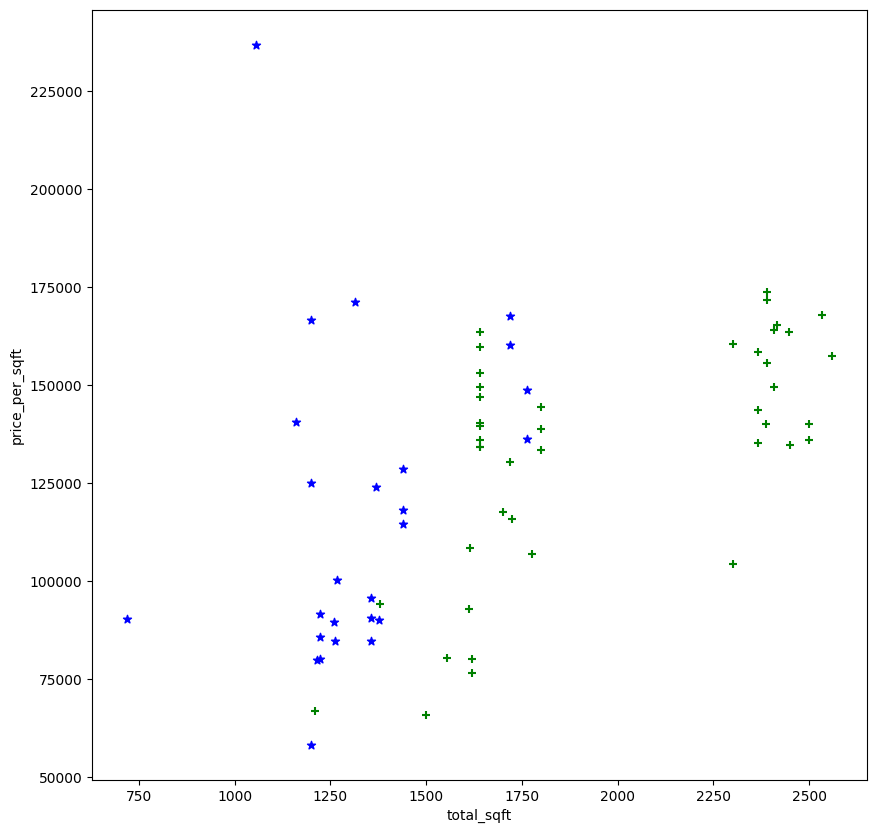

In [30]:
def compare_2_3(df,location) :
    bhk2 = df[( df.location == location ) & (df.bhk == 2)]
    bhk3 = df[(df.location == location ) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (10,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,marker='*',label = '2BHK',color='blue')
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',label = '3BHK',color='green')
    plt.xlabel('total_sqft')
    plt.ylabel('price_per_sqft')
    plt.show()
compare_2_3(df7,'Rajaji Nagar')


From the graph we can see that for the same price per sqft , same location the price for 2bhk is greater than 3bhk which is logicallly not correct , we need to remove them

In [31]:
def remove_bhk_outliers(df) :

    exclude_indices = np.array([])

    for location,loc_df in df.groupby('location') :
        bhk_stats = {}

        # getting bhk details of a location 
        for bhk,bhk_df in loc_df.groupby('bhk') :
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            } 

        # if nth bhk price is less than n-1th mean then we should filter it out
        for bhk,bhk_df in loc_df.groupby('bhk') :
            stats = bhk_stats.get(bhk-1) #n-1 bhk
            if stats and stats['count'] > 5 :
                # getting the indices of outliers
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values) 
        
    return df.drop(exclude_indices,axis = 'index')

df8 = remove_bhk_outliers(df7)

print(df8.shape)

(8623, 6)


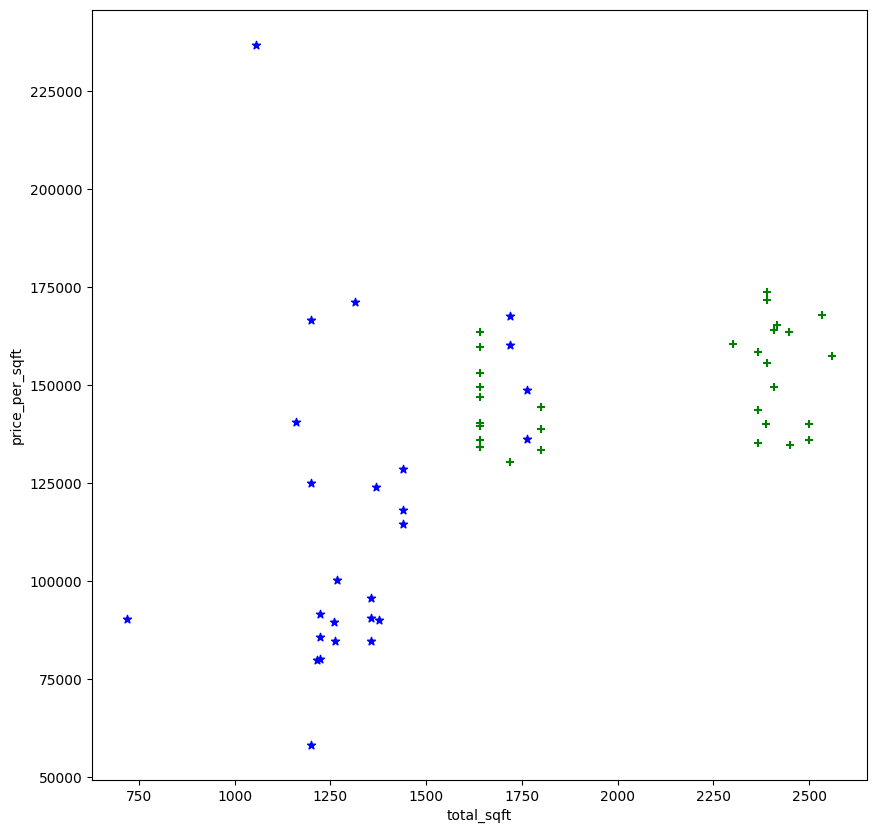

In [32]:
compare_2_3(df8,'Rajaji Nagar')

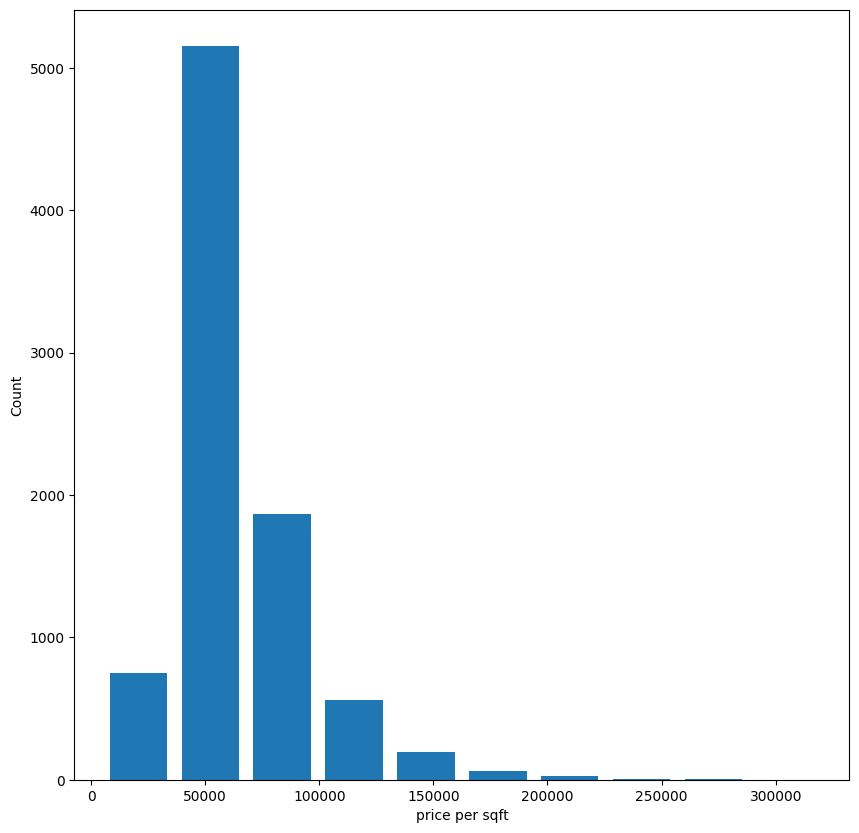

In [33]:
plt.hist(df8['price_per_sqft'],rwidth=0.8)
plt.xlabel('price per sqft')
plt.ylabel('Count')
plt.show()

In [34]:
df8.bath.unique()
# bathroom outlier => no. of bedrooms + 2 < baths

array([ 4.,  3.,  2.,  5.,  7.,  1.,  8.,  6.,  9., 10., 12., 16., 13.])

In [35]:
df8[df8['bath'] > df8['bhk']+2]
# we can just remove them since there is only 5

,location,total_sqft,bath,price,bhk,price_per_sqft
1945,Chikkabanavar,2460.0,7.0,80.0,4,32520.325203
6404,Nagasandra,7000.0,8.0,450.0,4,64285.714286
7039,Rajaji Nagar,7500.0,8.0,1700.0,5,226666.666667
8283,Thanisandra,1806.0,6.0,116.0,3,64230.343300
10170,other,11338.0,9.0,1000.0,6,88198.976892


In [36]:
df9 = df8[df8['bath'] < df8['bhk']+2]
df9.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,150175.438596
1,1st Block Jayanagar,1630.0,3.0,194.0,3,119018.404908
2,1st Block Jayanagar,1875.0,2.0,235.0,3,125333.333333
3,1st Block Jayanagar,2400.0,4.0,450.0,4,187500.000000
4,1st Block Jayanagar,1000.0,3.0,60.0,2,60000.000000


In [37]:
# price_per_sqft can be dropped , we just used for outlier detection
df10 = df9.drop(['price_per_sqft'],axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,450.0,4
4,1st Block Jayanagar,1000.0,3.0,60.0,2


In [38]:
dummies = pd.get_dummies(df10.location)

In [39]:
df11 = pd.concat([df10,dummies.drop('other',axis = "columns")],axis = "columns")
df12 = df11.drop('location',axis = 1)

In [40]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2400.0,4.0,450.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1000.0,3.0,60.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
x = df12.drop('price',axis = 1)
y = df12.price

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.score(x_test,y_test)

0.7709598706146221

In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.81815377, 0.77944984, 0.54938592, 0.48883001, 0.77719024])

In [45]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model(x,y) :
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },

        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
            }
        },
        
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion':['mse','friedman_mse'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 0)

    for algo_name, config in algos.items() :
        gs = GridSearchCV(config['model'],config['params'],cv = cv,return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(x,y)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
    valida

,model,best_score,best_params
0,linear_regression,0.682602,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.682657,{'alpha': 0.001}
2,decision_tree,0.688911,"{'criterion': 'friedman_mse', 'max_depth': 20,..."


In [46]:
def predict_price(location,sqft,bath,bhk) :
    loc_index = np.where(x.columns == location)[0][0]
    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk

    if loc_index >= 0 :
        X[loc_index] = 1
    
    return lin_reg.predict([X])[0]

In [47]:
predict_price('1st Phase JP Nagar',1000,3,3)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.58656650992064

In [48]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


166.90035881017138

In [51]:
import pickle 
with open('house_price_prediction_model.pickle','wb') as f :
    pickle.dump(lin_reg,f)
